# Essential Classification Algorithms with Explanation

Hello! I am a beginner in Machine Learning by myself and wrote this notebook to summarize what I have self-taught from online materials. Hope this could also help other beginners like me! This notebook is going to focus on the __most essential Supervised ML algorithms__ that used mainly for __classification__ problem.

For each algorithm, there are simple __explanations of how the algorithm works__, what are their pros and cons, and __some example codes__ to demonstrate how it could be used in python (in just a few lines!). 

I will keep on improving the notebook and add more stuff. Please enjoy and leave comments if you have suggestions or questions (or if you find some mistakes!). I will be more than happy to discuss! After all I think this is the most efficient way to learn :)

## Content

1. Types of Machine Learning (ML) Algorithms
2. What is Supervised ML
3. The Data Set
    - Data exploration with visualization using seaborn library
4. Supervised ML algorithms (each with explanation + code)
    - k-Nearest Neighbour 
    - Naive Bayes
    - Decision Tress/Random Forest
    - Support Vector Machine

## Types of Machine Learning
There are mainly three (or four) types of learning style, and are classified by the availability of target variable (or output) of the training data:
- Supervised Learning
- Unsupervised Learning
- (Semi-supervised Learning)
- Reinforcement Learning

<img src="images/ML_types.png" style="width:500;height:300px;">
<caption><center>Types of ML (https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861)</center></caption>

## What is Supervised Learning
It takes data to train a supervised machine learning algorithms. Both __INPUT__ variable(s) and __TARGET__ variable should be available for each training data (labelled data). A supervised learning algorithm then tries to learn the __relationship__ between the input and output variables from the data, so that when given input X, it is able to produce the corresponding output y. And to do so, the algorithm iterates the training data to adjust the parameters of a __model (or a function)__, until it could __generalize__ the data. This is called the __learning process__.

<img src="images/Supervised_ML.png" style="width:500px">
<caption><center>The Learning Process of Supervised ML</center></caption>

### Classfication vs Regression

Depending on the type of target variable, the machine is either facing a __Classification__ or __Regression__ problem. 

A __Classification__ problem is when the target variable is __categorical__ (i.e. the output could be classified into classes - it belongs to either Class 1 or 2 or something else). 

While a __Regression__ problem is when the target variable is __continuous__ (i.e. the output is numeric). 

<img src="images/Regression_vs_Classification.png" style="width:500px">
<caption><center>Regression vs Classfication.<br>We predict the predicted return with the output as a number (Regression) <br> or whether the stock market is going to be a bull (rising) or bear (falling) (Classification)<br>(https://quantdare.com/machine-learning-a-brief-breakdown/)</center></caption>

Some Supervised Learning algorithms work for both types of problems while some works on only one. Below are some popular ones: 

- __k-Nearest Neighbour__ (Classificiation)
- __Naive Bayes__ (Classificiation)
- __Decision Tress/Random Forest__ (Classificiation and Regression)
- __Support Vector Machine__ (Classificiation)
- Linear Regression (Regression)
- Logistic Regression (Classificiation)

Some deep learning algorithms:
- Neural Network
- Convolution Network
- Recurrent Network

This notebook is going to focus on the __Classification__ algorithms. We will go through the highlighted ones, with explanation of how they work. 

But before that, let's look into the __example data__ that we are going to use.

## The Dataset

We are using the famous Iris dataset, and try to train different learning algorithms to classify iris flowers into one of the three speicies, from attributes like petal length and width.

<img src="images/iris.png" style="width:500px">
<caption><center>Classifying three types of Iris.<br>(https://www.datacamp.com/community/tutorials/machine-learning-in-r)</center></caption>

### Data Exploration
First import some libraries, for data handling and visualization. We are not going deep into data exploration as we will focus on the ML algorithms instead. Nevertheless, let's briefly look at the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
sns.set_palette("Set2")
iris = pd.read_csv("data/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


There are 4 attributes for each entry. With paired scatter plots and violin plots. We can clearly observe that different species form clusters. And the values of attributes like petal length and width seem to differ between species.

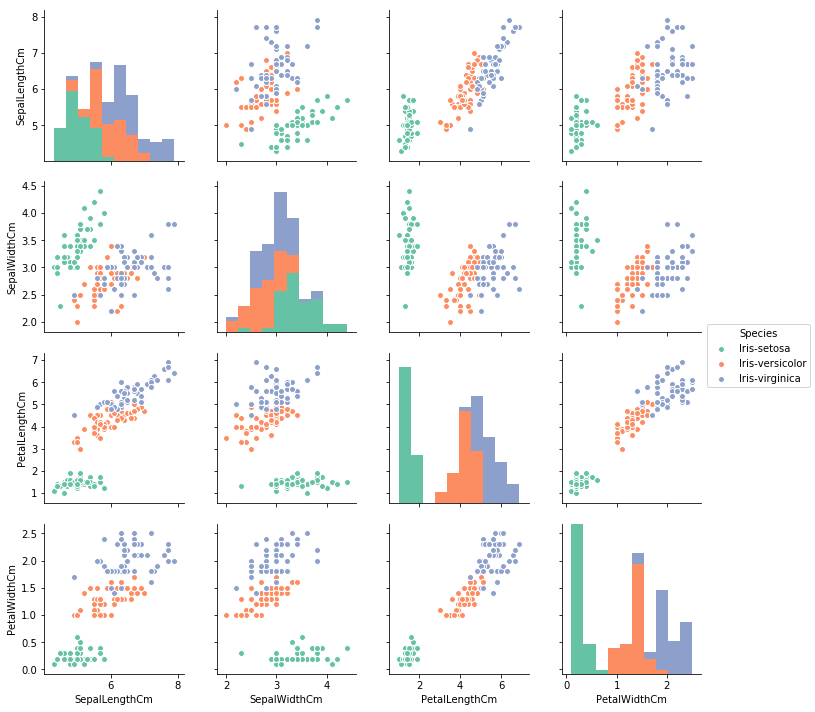

In [54]:
sns.pairplot(iris.drop(['Id'], axis=1), hue="Species")

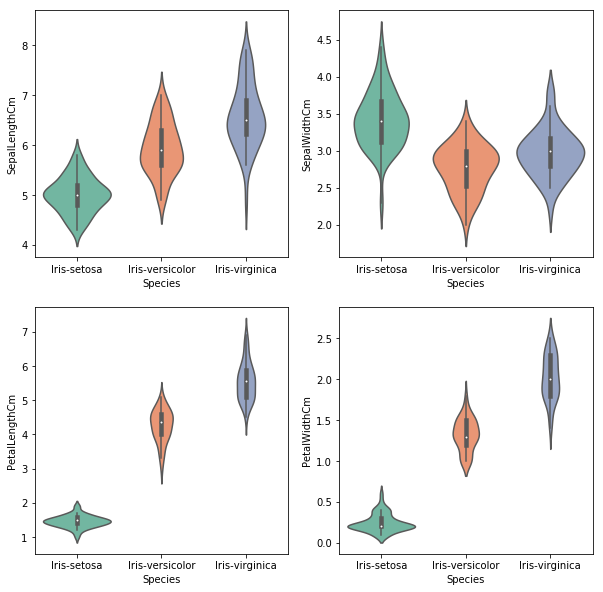

In [55]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 10))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, ax=ax1)
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, ax=ax2)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, ax=ax3)
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, ax=ax4)

## Supervised ML algorithms

### 1. K-NEAREST NEIGHBOUR (kNN)
kNN classfied an object by a majority vote of the object's neighbours, in the space of input parameter. The object is assigned to the class which is most common among its __k (an integer specified by human) nearest neighbour__. It is a __non-parametric, lazy algorithm__. It's non-parametric since it does not make any assumption on data distribution (the data does not have to be normallly distributed). It is lazy since it does not really learn any model and make generalization of the data (It does not train some parameters of some function where input X gives output y). 

So strictly speaking, this is not really a learning algorithm. It simply classfies objects based on __feature similarity__ (feature = input variables). 

<img src="images/kNN.png" style="width:500;height:300px;">
<caption><center>kNN<br>(https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)</center></caption>

Now we import some ML libraries and start analysis! We will be using the scikit-learn, a machine learning library for all the algorithms we use in this notebook.

Using this library, we could create an iris classifier in just 5 lines of code!

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
# 1. declare the classifer
# n_neighbours is the number of closest neighbours we should consider when making a "vote"
knn = KNeighborsClassifier(n_neighbors = 3)

# 2. prepare the input variable x, and target output y
x,y = iris.drop(['Id','Species'],axis=1), iris['Species']

# 3. split the dataset into two parts, one for training, one for testing the model later
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

# 4. fit the model using the training data
knn.fit(x_train,y_train)

# 5. make prediction with the input from test data
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9777777777777777


And there you are! With just a few lines a classifier with 97.7% accuracy is created!

#### Pros of kNN:
- Non-parametric, No assumption on data, not much data preparation (normalization etc)
- Insensitive to outliers
- Simple but relatively high accuracy

#### Cons kNN:
- High memory requirement (as it needs all data to make prediction)
- Computational expensive (same reason)
- Could be slow if database is large (same reason)

#### Examples of kNN
- Loan ratings: Collect financial characteristics of people (their savings, their credits, late payment, etc) and determin should be borrow money to this person
- University entrace: Collect data on the academic results, extra-curricular activities and determine if this person should go to Uni
- Politics: knowing the political preferences of a person and predict who he/she will vote for

### 2. NAIVE BAYES (NB)
Naive Bayes classifies objects based on Bayes' Theorem with an assumption that the predictors (features) are independent of each other. Bayes theorem is a way to calculate posterior probability P(c|x) from the P(c), P(x), P(x|c). Naive Bayes is naive because it assumes the presence of a particular feature is completely unrelated to the presence of another, and each of them contribute to the posterior probability independently. Therefore the posterior probability could be expressed as follows:

<img src="images/Bayes_rule.png" style="width:300px;height:172px;">
<caption><center>Bayes' Theorem<br>(https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)</center></caption>

We could use Naive Bayes to calculate the probability of some class c given the condition x. Let's use the data below as an example. 
- Step 1: We convert the data to a __frequency table__
- Step 2: We calculate the probability of each outcome P(c), each weather condition P(x), and the likelihood P(x|c)
- Step 3: We can then plug in the numbers into the NB equation above to calculate the probability of each outcome (class) given some weather condition P(c|x). Assign the object to the class with the __highest probability__

<img src="images/Bayes_example.png" style="width:850px;height:310px;">
<caption><center>Bayes' Theorem Example<br>(https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)</center></caption>

Now we import some ML libraries and start analysis!

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [7]:
nb = GaussianNB()
x,y = iris.drop(['Id','Species'],axis=1), iris['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)

print('With NB accuracy is: ',nb.score(x_test,y_test)) # accuracy

With NB accuracy is:  0.9333333333333333


You see using the sklearn library, the codes are almost the same, we just changed the classifier from kNN to Gaussian NB. It's called __Gaussian NB__ because it assumes the distribution of likelihood of features P(x|c) to be Gaussian (normal). 

Other types of NB includes Multinomial, which assumes multinomially distributed data, and is usually used to text classification where the data are typically represented as word vector counts (http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

#### Pros of NB:
- Fast and relatively high accuracy in multiclass problem
- Performs well with less training data (when the assumption of independence hold, and the input features are categorical)

#### Cons of NB:
- Assumption of independent predictors, which is almost impossible in real life situation
- Assumption of normally distributed input features, if it's continuous
- If the categorical variable has a category in the test data but not in the train data, the probability of this cat will be assigned zero and prediction is not possible

#### Example of NB:
- Real time prediction: It's an eager learning algorithm (in constrast to kNN), which means it constructs a model that tries to generalize stuff, so it's fast
- Text classification/sentiment analysis/spam filtering: Multiclass problem where independence rule holds
- Recommendation system

### 3.1 Decision Tree
Decision Tree, as it name says, makes decision with tree-like model. It splits the sample into two or more homogenous sets (leaves) based on the most significant differentiators in your input variables. To choose a differentiator (predictor), the algorithm considers all features and does a binary split on them (for categorical data, split by cat; for continuous, pick a cut-off threshold). It will then choose the one with the least cost (i.e. highest accuracy), and repeats recursively, until it successfully splits the data in all leaves (or reaches the maximum depth).  

<img src="images/DT.png" style="width:310px;height:310px;">
<caption><center>Decision Tree Example<br>(https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)</center></caption>

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
dtree = DecisionTreeClassifier()
x,y = iris.drop(['Id','Species'],axis=1), iris['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.9555555555555556


We can visualise how the decision tree made the splits. First it looks at X[3], the fourth input variable PetalWidthCm, if it is less than 0.8, separates the samples into two groups. The "True" group (less than 0.8) is a homogenous set which all members belong to the first species [36,0,0]. The tree then goes on with the leaves that are non-homogenous.

In [74]:
from sklearn import tree
tree.export_graphviz(dtree, out_file="tree.dot")
# Then at terminal first install dot:
# brew install graphviz
# and then convert to png:
# dot -Tpng tree.dot -o tree.png

<img src="images/tree.png" style="width:500px;">
<caption><center>Visualizing the decision tree</center></caption>

#### Pros of Decision Tree:
- __Simple__ to understand and visualize
- __Fast__ to identify significant variables, useful for quick data exploration
- Relatively __insensitive to outlier__, not much data clearning require
- __Non-parametric__, no assumption about data

#### Cons of Decision Tree:
- __Overfitting__ : could be solved by random forest
- __Suboptimal decision tree__: Greedy algorithm can't guarantee globally optimal tree, solved by RF
- __Information lost__: When work with continous variable, information might be loose when it categorizes variables by making cut-offs

https://www.analyticsvidhya.com/blog/2015/01/decision-tree-simplified/2/

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

#### Setting constrains to prevent overfitting

If we let Decision Tree to make split until it ends up with homogenous set in all leaves, for data with different groups of samples overlapping each other a lot, overfitting might occur and we might observe some leaves with only 1 or 2 samples. To avoid that, we could put these constrains to the decision tree:

- Minimum samples for a node split and each terminal node
- Maximum depth of tree
- Maximum number of nodes
- Maximum features to consider to split

In [11]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)

### 3.2 Random Forest
Random forest is an ensemble model that grows multiple tree and classify objects based on the "votes" of all the trees. i.e. An object is assigned to a class that has most votes from all the trees. By doing so, the problem with high bias (overfitting) could be alleviated.

To build multiple trees, we use techiniques such as bagging and bootstrap. Bootstrap resamples and replaces the data.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [72]:
rf = RandomForestClassifier()
x,y = iris.drop(['Id','Species'],axis=1), iris['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ',rf.score(x_test,y_test)) # accuracy
# We might not see an increase of accuracy here, 
# as the sample size is small and the original accuracy is already quite high

With Random Forest accuracy is:  0.9555555555555556


Looks like of Decision Tree doesn't have the problem of overfitting! so Random Forest couldn't improve the accuracy.

#### Pros of RF:
- It could handle large data set with high dimensionality, output __Importance of Variable__, useful to explore the data
- Could handle missing data while maintaining accuracy

#### Cons of RF:
- Could be a black box, users have little control on what the model does

https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

### 4. Support Vector Machine
Support Vector Machine (SVM) constructs a __hyperplane__ (or a set of hyperplanes in higher dimensional space) in the feature space, that could separate objects into classes. A good hyperplane is the one that has the largest distance to the nearest training data-point of any class. Those nearest training data points are called __Support Vectors__ :

<img src="images/SVM_1.png" style="width:310px;">
<caption><center>Examples of hyperplanes<br>H1 is not a good hyperplane as it doesn't separate the classes<br>H2 does but only with small margin<br>H3 separates them with maximum margin (distance)<br>(https://en.wikipedia.org/wiki/Support_vector_machine)</center></caption>

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

### Parameters of SVM

There are three main parameters which we could play with when constructing a SVM classifier:
- Type of kernel
- Gamma value
- C value

To better illustrate how the parameters could affect the outcome of the classifier, we use only 2 of the input attributes, so we could visualize the results on a figure.

In [73]:
X,y = iris.iloc[:,1:3], pd.factorize(iris['Species'])[0]

# Define the boundaries for the graphs we will draw later
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [74]:
# Defining a function that declare a SVM classifier, with different parameters, and make predictions
def make_mesh(kerneltype, Cval, gammaval="auto"):
    svc = SVC(kernel=kerneltype, C=Cval,gamma=gammaval)
    svc.fit(X, y)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return (Z)

#### Type of kernel
It could be either "linear", "poly" (polynomial), "sigmoid", etc. The one below is "linear", and as its name says, the hyperplanes will be linear.

Text(0.5,1,'SVC with linear kernel')

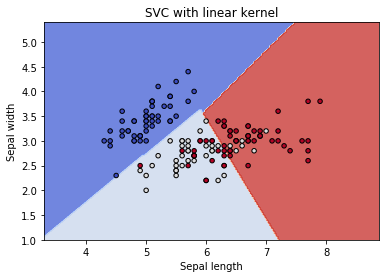

In [70]:
Z = make_mesh("linear", 1, gammaval="auto")
plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

The hyperplanes could be of course non-linear, if other types of kernels are used. The kernel type below "rbf" stands for Radial Basis Function. Other non-linear kernel include poly, i.e. polynomial functions (need to specify the degree).

Text(0.5,1,'SVC with rbf kernel')

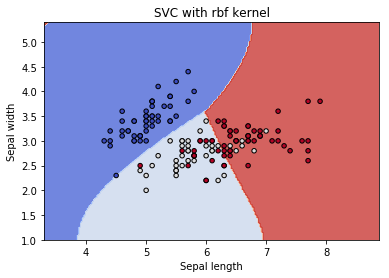

In [58]:
Z = make_mesh("rbf", 1, gammaval="auto")
plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')

#### Gamma value
It is essential for rbf, poly and sigmoid kernel. Higher the gamma value, more influence a single training examples has and the more it will try to exactly fit the data

Text(0.5,1,'Gamma = 100')

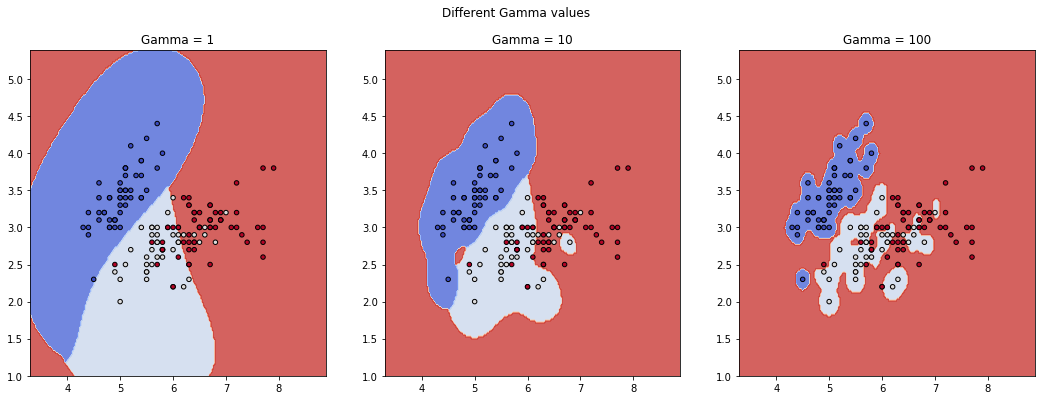

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Different Gamma values')

Z = make_mesh("rbf", 1, gammaval=1)
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_title("Gamma = 1")

Z = make_mesh("rbf", 1, gammaval=10)
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_title("Gamma = 10")

Z = make_mesh("rbf", 1, gammaval=100)
ax3.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax3.set_title("Gamma = 100")

#### C value
C is the regularization parameter. Higher the C value, the more it will try to classify all data correctly. Lower the C value, smoother is decision boundary

Text(0.5,1,'C = 100')

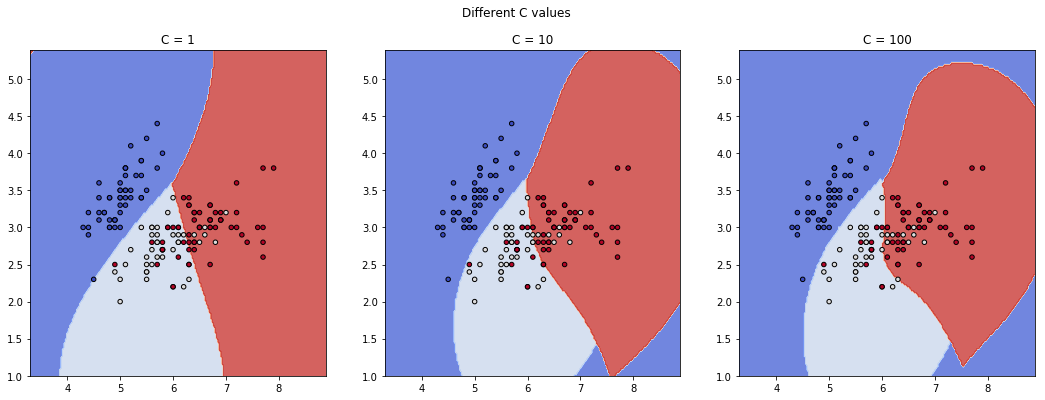

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Different C values')

Z = make_mesh("rbf", 1, gammaval="auto")
ax1.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax1.set_title("C = 1")

Z = make_mesh("rbf", 10, gammaval="auto")
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax2.set_title("C = 10")

Z = make_mesh("rbf", 100, gammaval="auto")
ax3.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm,s=20, edgecolors='k')
ax3.set_title("C = 100")

#### Pros of SVM:
- Effective in __high dimensional space__ (even when it's greater than no. of samples)
- __Memory efficient__, because it only uses a few training points as support vectors
- Performs well if there is __clear margin__ of separation

#### Cons of SVM:
- __Long training__ time if data set is large
- Does not perform well if there are __overlaps__ in target classes (noises)

## Thanks for reading!

Ok so that's it for now! I hope to expand the notebook to other ML algorithms in the near future. That really helps me learn! Hope that helps you a bit too!

### Please give me an upvote as an encouragment! Thank you :)